In [13]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
include("../Inversion/Plot.jl")
include("../Inversion/GMBBVI-QuadRule.jl")
include("../Derivative-Free-Variational-Inference/MultiModal.jl")
Random.seed!(123);

[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 50, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 100, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 150, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 200, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 250, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 300, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 350, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 400, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 450, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 500, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("dt=", 0.5)
[ Info: ("iter = ", 50, " / ", 500)
[ Info: ("dt=", 0.5)
[ Info:

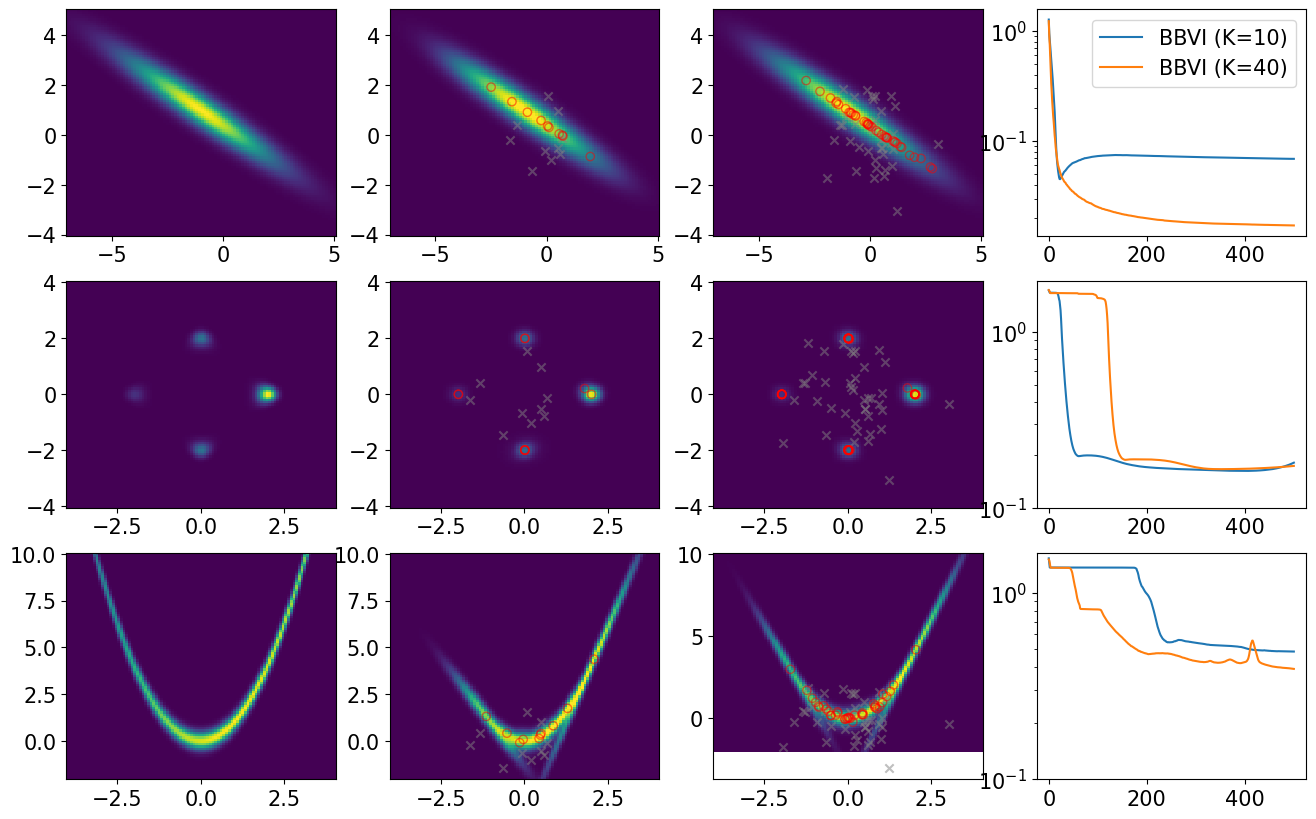

In [ ]:
N_modes_array = [10,40]    
fig, ax = PyPlot.subplots(nrows=3, ncols=length(N_modes_array)+2, sharex=false, sharey=false, figsize=(16,10))


N_modes = N_modes_array[end]
x0_w  = ones(N_modes)/N_modes
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
N_x = length(μ0)
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :] .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_cov[im, :, :] .= Σ0
end

N_iter = 500
Nx, Ny = 100,100
N_ens = 5

ση = 1.0
Gtype = "Gaussian"
dt = 0.5
A = [1.0 1.0; 1.0 2.0]
y = [0.0; 1.0; zeros(N_x-2)]
func_args = (y, ση, A , Gtype)
func_F(x) = F(x, func_args)
func_Phi(x) = 0.5*norm(func_F(x))^2
objs = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens)
        for N_modes in N_modes_array]
visualization_2d(ax[1,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_F=func_F, objs=objs, label="BBVI")



ση = 1.0
dt = 0.2
Gtype = "Four_modes"
y = [4.2297; 4.2297; 0.5; 0.0; zeros(N_x-2)]
func_args = (y, ση, 0, Gtype)
func_F(x) = F(x, func_args)
func_Phi(x) = norm(func_F(x),2)^2/2
objs = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens)
        for N_modes in N_modes_array]
visualization_2d(ax[2,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-4.0, 4.0], func_F=func_F, objs=objs)




ση = [sqrt(10.0); ones(N_x-2)]
Gtype = "Banana"
dt = 0.5
λ = 10.0
y = [0.0; 1.0; zeros(N_x-2)]
func_args = (y, ση, λ , Gtype)
func_F(x) = F(x, func_args)
func_Phi(x) = norm(func_F(x),2)^2/2
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
objs = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens)
        for N_modes in N_modes_array]
visualization_2d(ax[3,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_F=func_F, objs=objs)





# fig.tight_layout()
# fig.savefig("BBVI-GMD-Multimodal.pdf")


In [15]:
# N_modes_array = [10,20,40]    
# fig, ax = PyPlot.subplots(nrows=6, ncols=length(N_modes_array)+2, sharex=false, sharey=false, figsize=(20,20))


# N_modes = N_modes_array[end]
# x0_w  = ones(N_modes)/N_modes
# N_x = 10
# μ0, Σ0 = zeros(N_x), Diagonal(ones(N_x))
# x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
# for im = 1:N_modes
#     x0_mean[im, :] .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
#     xx0_cov[im, :, :] .= Σ0
# end

# N_iter = 200
# Nx, Ny = 100,100
# N_ens = 20

# ση = 1.0
# Gtype = "Gaussian"
# dt = 0.5
# A = [1.0 1.0; 1.0 2.0]
# y = [0.0; 1.0; zeros(N_x-2)]
# func_args = (y, ση, A , Gtype)
# func_F(x) = F(x, func_args)
# func_Phi(x) = 0.5*norm(func_F(x))^2
# objs1 = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens*N_modes, random_quadrature_type="Gaussian_mixture")
#         for N_modes in N_modes_array]
# objs2 = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens, random_quadrature_type="single_Gaussian")
#         for N_modes in N_modes_array]
# y_2d = y[1:2]
# func_args = (y_2d, ση, A , Gtype)
# func_F(x) = F(x, func_args)
# visualization_2d(ax[1,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_F=func_F, objs=objs1, label="BBVI-GM")
# visualization_2d(ax[2,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_F=func_F, objs=objs2, label="BBVI-SG")



# ση = 1.0
# dt = 0.5
# Gtype = "Four_modes"
# y = [4.2297; 4.2297; 0.5; 0.0; zeros(N_x-2)]
# func_args = (y, ση, 0, Gtype)
# func_F(x) = F(x, func_args)
# func_Phi(x) = norm(func_F(x),2)^2/2
# objs1 = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens*N_modes, random_quadrature_type="Gaussian_mixture")
#         for N_modes in N_modes_array]
# objs2 = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens, random_quadrature_type="single_Gaussian")
#         for N_modes in N_modes_array]
# y_2d = y[1:4]
# func_args = (y_2d, ση, A , Gtype)
# func_F(x) = F(x, func_args) 
# visualization_2d(ax[3,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-4.0, 4.0], func_F=func_F, objs=objs1, label="BBVI-GM")
# visualization_2d(ax[4,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-4.0, 4.0], func_F=func_F, objs=objs2, label="BBVI-SG")



# ση = [sqrt(10.0);sqrt(10.0); ones(N_x-2)]
# Gtype = "Banana"
# dt = 0.5
# λ = 10.0
# y = [0.0; 1.0; zeros(N_x-2)]
# func_args = (y, ση, λ , Gtype)
# func_F(x) = F(x, func_args)
# func_Phi(x) = norm(func_F(x),2)^2/2
# μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
# objs1 = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens*N_modes, random_quadrature_type="Gaussian_mixture")
#         for N_modes in N_modes_array]
# objs2 = [Gaussian_mixture_BBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens, random_quadrature_type="single_Gaussian")
#         for N_modes in N_modes_array]
# y_2d, ση_2d = y[1:2], ση[1:2]
# func_args = (y_2d, ση_2d, λ , Gtype)
# func_F(x) = F(x, func_args)
# visualization_2d(ax[5,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_F=func_F, objs=objs1, label="BBVI-GM")
# visualization_2d(ax[6,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_F=func_F, objs=objs2, label="BBVI-SG")




# # fig.tight_layout()
# # fig.savefig("BBVI-GMD-Multimodal.pdf")
